### IMDB dataset explorer

This notebook will help to explore the data set `imdb`
In particular we are going to perform the same analysis as in `imdb_explorer.pynb`, but performing before the cleaning of the stopwords and reducing each word to its stamm.

In [1]:
%load_ext autoreload
%autoreload 2


from sentimental_hwglu.naive_sa import NaiveSA
from sentimental_hwglu.utils import *
from sentimental_hwglu.words_statistics import WordStatistics
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import time
import re


#### Load Data

In [2]:
project = Project('/data/zibaldone/projects/ai/zbb/data')
df = loadIMDBdataset(filename=project.csv_filename_extened)
n_reviews = len(df.reviews)

In [80]:
# df['reviews'] = df.reviews.apply(lambda x : ' '.join([word for word in tokenizer_porter(x) if word not in stopwords.words('english')]))
def __():
    df = df.reset_index() 
    df['stamm'] = df.reviews
    for n, row in df.iterrows():
        r = row['reviews']
        progressbar(n, n_reviews, step=1)
        text = ' '.join([word for word in tokenizer_porter(r) if word not in stopwords.words('english')])
        df.loc[n, 'stamm'] = text


In [6]:
# df['reviews'] = df.reviews.apply(lambda x : ' '.join([word for word in tokenizer_porter(x) if word not in stopwords.words('english')]))
words = set()
for n, r in enumerate(df.reviews):
    progressbar(n, n_reviews)
    for w in tokenizer(r):
        words.add(w)

In [8]:
def __():
    stamm_words = set()
    for n, r in enumerate(df.reviews):
        progressbar(n, n_reviews)
        for w in tokenizer_porter(r):
            stamm_words.add(w)
stamm_words = set()
for n, r in enumerate(df.stamm):
    progressbar(n, n_reviews)
    for w in r.split():
        stamm_words.add(w)

In [9]:
print("n. words: ", len(words))
print("n. stammwords: ", len(stamm_words))
print("diff: ", len(words) - len(stamm_words))

n. words:  422502
n. stammwords:  390563
diff:  31939


In [97]:
length_words = []
n_words = len(words)
for n, w in enumerate(words):
    progressbar(n, n_words)
    length_words.append(len(w))

In [98]:
length_stamm_words = []
n_words = len(stamm_words)
for n, w in enumerate(stamm_words):
    progressbar(n, n_words)
    length_stamm_words.append(len(w))

In [101]:
stamm_no_stop = []
n_words = len(stamm_words)
for n, w in enumerate(stamm_words):
    if w in stopwords.words('english'): continue
    progressbar(n, n_words)
    stamm_no_stop.append(len(w))
print("--------------------------------------")
words_no_stop = []
n_words = len(words)
for n, w in enumerate(words):
    if w in stopwords.words('english'): continue
    progressbar(n, n_words)
    words_no_stop.append(len(w))

--------------------------------------


In [102]:
print("n. words:                    ", len(words))
print("n. stammwords:               ", len(stamm_words))
print("diff:                        ", len(words) - len(stamm_words))
print("n. words no stop words:      ", len(words_no_stop))
print("n. stammwords no stop words: ", len(stamm_no_stop))
print("diff:                        ", len(words_no_stop) - len(stamm_no_stop))

n. words:                     422502
n. stammwords:                390699
diff:                         31803
n. words no stop words:       422337
n. stammwords no stop words:  390563
diff:                         31774


In [61]:
import pandas as pd
wf = pd.DataFrame({'words': length_words})
wf_stamm = pd.DataFrame({'words': length_stamm_words})
wf_nostop = pd.DataFrame({'words': words_no_stop})
wf_stamm_nostop = pd.DataFrame({'words': stamm_no_stop})

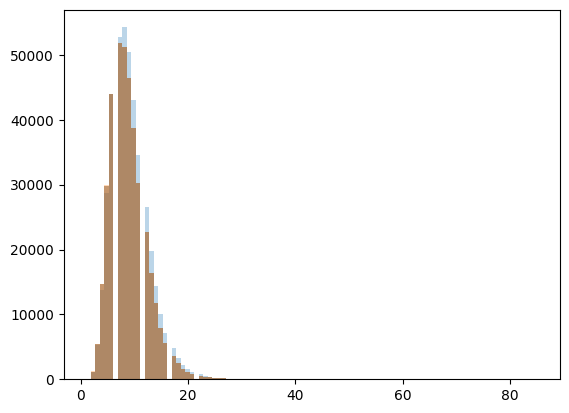

In [62]:
fig, axs = plt.subplots()
n_bins = 100
a = axs.hist(wf.words, bins=n_bins, alpha=0.3)
a = axs.hist(wf_stamm.words, bins=n_bins, alpha=0.3)
a = axs.hist(wf_nostop.words, bins=n_bins, alpha=0.3)
a = axs.hist(wf_stamm_nostop.words, bins=n_bins, alpha=0.3)

In [19]:
from nltk.corpus import stopwords

tokens1 = set(tokenizer_porter(df.reviews.iloc[0]))
tokens2 = set(tokenizer(df.original.iloc[0]))
tokens_1_A_2 = tokens1.intersection(tokens2)
filtered_words = [word for word in tokens1 if word not in stopwords.words('english')]

In [8]:
from sentimental_hwglu.plotter import StatisticWordsParameters, plot_statistics_words

dimension:  length  mode:  659
dimension:  length  mean:  1197.9418


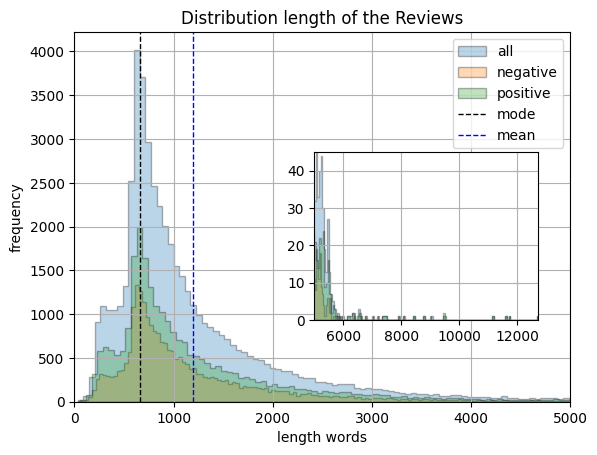

In [9]:
params = StatisticWordsParameters()
params.set_save(False)
params.set_xlim([0, 5000])
params.set_xlabel('length words')
params.set_ylabel('frequency')
params.set_title("Distribution length of the Reviews")
params.set_tail(True)
params.set_density(False)
params.set_tail_ylim([0, 0.00005] if params.density else [0, 45])
params.set_position_tail([0.5, 0.28, 0.35, 0.35])
params.set_hist_type('stepfilled')
params.set_mode(True)
params.set_mean(True)
plot_statistics_words(params, df, 'length')

In [ ]:
params.set_xlim([0, 600])
params.set_xlabel('number of words')
params.set_ylabel('frequency')
params.set_title("Distribution of the number of words in Reviews")
params.set_tail(True)
params.set_density(False)
params.set_tail_ylim([0, 0.00005] if params.density else [0, 200])
# params.set_position_tail([0.5, 0.35, 0.35, 0.35])
params.set_hist_type('stepfilled')
plot_statistics_words(params, df, 'words')

In [82]:
n_bins = int(np.sqrt(n_reviews))
df['length'] = df.stamm.apply(lambda x : len(x))
df['words'] = df.stamm.apply(lambda x : len(x.split()))
df['sentences'] = df.stamm.apply(lambda x : len([w for w in re.split('\.|!|\?|:', x) if len(w.strip()) > 0 and len(w.split()) > 3]))

In [84]:
from sentimental_hwglu.plotter import StatisticWordsParameters, plot_statistics_words

dimension:  length  mode:  479
dimension:  length  mean:  844.83504


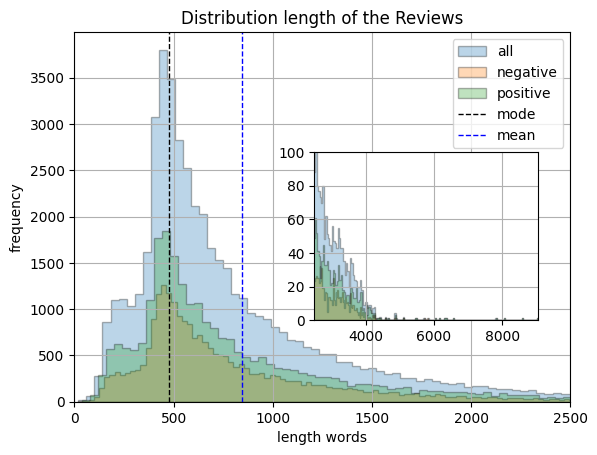

In [93]:
params = StatisticWordsParameters()
params.set_xlim([0, 2500])
params.set_xlabel('length words')
params.set_ylabel('frequency')
params.set_title("Distribution length of the Reviews")
params.set_tail(True)
params.set_density(False)
params.set_tail_ylim([0, 0.00005] if params.density else [0, 100])
params.set_position_tail([0.5, 0.28, 0.35, 0.35])
params.set_hist_type('stepfilled')
params.set_mode(True)
params.set_mean(True)
plot_statistics_words(params, df, 'length')

dimension:  words  mode:  72
dimension:  words  mean:  132.6218


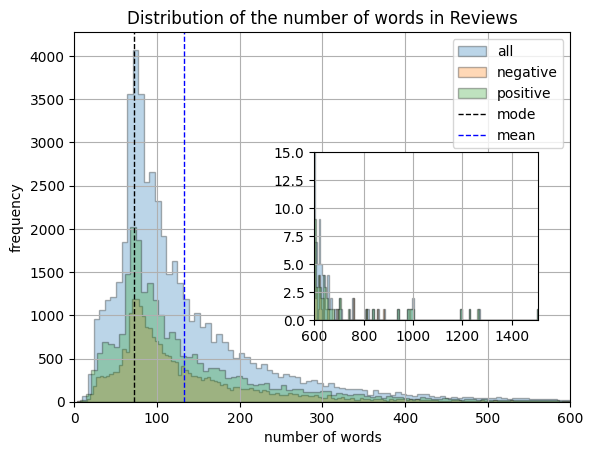

In [88]:
params.set_xlim([0, 600])
params.set_xlabel('number of words')
params.set_ylabel('frequency')
params.set_title("Distribution of the number of words in Reviews")
params.set_tail(True)
params.set_density(False)
params.set_tail_ylim([0, 0.00005] if params.density else [0, 15])
# params.set_position_tail([0.5, 0.35, 0.35, 0.35])
params.set_hist_type('stepfilled')
plot_statistics_words(params, df, 'words')

dimension:  sentences  mode:  8
dimension:  sentences  mean:  11.53256


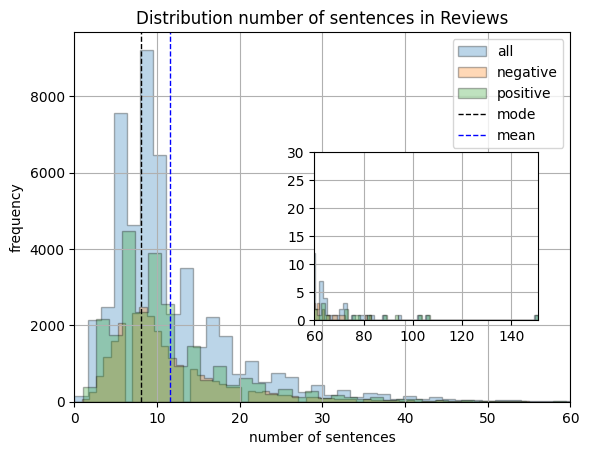

In [89]:
params.set_xlim([0, 60])
params.set_xlabel('number of sentences')
params.set_ylabel('frequency')
params.set_title("Distribution number of sentences in Reviews")
params.set_tail(True)
params.set_density(False)
params.set_bins(95)
params.set_tail_ylim([0, 0.00005] if params.density else [0, 30])
# params.set_position_tail([0.5, 0.35, 0.35, 0.35])
params.set_hist_type('stepfilled')
plot_statistics_words(params, df, 'sentences')


In [81]:
pandas2csv(df, project.get_filename(project.csv_filename, tag='extended'))